#  Decesion Tree on DonorsChoose Dataset 

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

## 1.1 Reading Data 

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')


In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
101880        5749  p096076  6eaa448903897a152320bd23a30147b2           Mrs.   
31477        47750  p185738  3afe10b996b7646d8641985a4b4b570d           Mrs.   

       school_state                Date project_grade_category  \
101880           CA 2016-01-05 00:00:00          Grades PreK-2   
31477            UT 2016-01-05 01:05:00          Grades PreK-2   

       project_subject_categories project_subject_subcategories project_title  \
101880             Math & Science                   Mathematics  Math Madness   
31477              Math & Science                   Mathematics  Math is Fun!   

                                          project_essay_1  \
101880  A typical day in our classroom is full of enco...   
31477   \"The only way to learn mathematics is to do m...   

                                          project_essay_2  \
101880  I have 28 first graders who want to be heard a...   
31477   My students love coming to school and working ...   

                                          project_essay_3  \
101880  These materials will be used in math centers. ...   
31477   My students will be using these math manipulat...   

                                          project_essay_4  \
101880  I will be able to use these donations for coun...   
31477   Learning about money is important so the stude...   

                                 project_resource_summary  \
101880  My students need different math manipulatives,...   
31477   My students need base ten blocks, realistic pl...   

        teacher_number_of_previously_posted_projects  project_is_approved  
101880                                            11                    0  
31477                                              0                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### Preprocessing of `teacher_prefix`

In [9]:
#“Teacher prefix” data having the dots(.) and its has been observed the some rows are  empty in  this feature . 
#the dot(.) and  empty row available in the data consider as float datatype and it does not 
# accepted by the .Split() – Pandas function , so removing the same. 
# cleaning has been done for the same following references are used 
# 1.	Removing (.) from dataframe column - used ".str.replce" funtion (padas documentation)
# 2.	for  empty cell in datafram column - added the "Mrs." (in train data.cvs) which has me mostly occured in data set.

project_data["teacher_prefix_clean"] = project_data["teacher_prefix"].str.replace(".","")
project_data.head(2)
print(project_data.teacher_prefix_clean.shape)

(109248,)


## 1.4 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
101880        5749  p096076  6eaa448903897a152320bd23a30147b2           Mrs.   
31477        47750  p185738  3afe10b996b7646d8641985a4b4b570d           Mrs.   

       school_state                Date project_grade_category project_title  \
101880           CA 2016-01-05 00:00:00          Grades PreK-2  Math Madness   
31477            UT 2016-01-05 01:05:00          Grades PreK-2  Math is Fun!   

                                          project_essay_1  \
101880  A typical day in our classroom is full of enco...   
31477   \"The only way to learn mathematics is to do m...   

                                          project_essay_2  \
101880  I have 28 first graders who want to be heard a...   
31477   My students love coming to school and working ...   

                                          project_essay_3  \
101880  These materials will be used in math centers. ...   
31477   My students will be using these math manipulat...   

                                          project_essay_4  \
101880  I will be able to use these donations for coun...   
31477   Learning about money is important so the stude...   

                                 project_resource_summary  \
101880  My students need different math manipulatives,...   
31477   My students need base ten blocks, realistic pl...   

        teacher_number_of_previously_posted_projects  project_is_approved  \
101880                                            11                    0   
31477                                              0                    1   

       clean_categories clean_subcategories teacher_prefix_clean  \
101880     Math_Science         Mathematics                  Mrs   
31477      Math_Science         Mathematics                  Mrs   

                                                    essay  
101880  A typical day in our classroom is full of enco...  
31477   \"The only way to learn mathematics is to do m...

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)



A typical day in our classroom is full of encouragement and exploration. With common core and being more open to allowing students to make more mistakes has helped me improve and see students thinking in a different way. My students are math problem solvers who are enjoying math.I have 28 first graders who want to be heard and understood. Who want to enjoy math. By creating and finding different math games that continues to help them build fluency and number sense, my students are enjoying and doing math at their own pace. They are enjoying what they are learning and want to practice it in numerous ways.These materials will be used in math centers. Students will be able to explore and play games while practicing the skills they need. By playing these games they will be more engaged and will learn as they gain the skills they need to learn. They will practice learning their doubles, practice adding and subtracting and will be able to have fun. I want to create an environment in which my

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*50)

My students attend a Title I school in downtown Oakland. Coming from diverse cultural/ethnic backgrounds and socioeconomically disadvantaged neighborhoods, these students know the meaning of perseverance & consistently give their best in all that they do. They are inquisitive, enthusiastic, curious, eager to explore new things and ask compelling questions. \r\nUnsatisfied by the cursory \"textbook\" explanation and uninterested in just memorizing the the correct formula to get a good grade, these students are always asking the how is and why is, thinking critically and analyzing the information that is presented to them. As a result of their hard work, they have consistently exceeded district norms on standardized testing. Between Math and ELA, we had a total of 14 perfect scores in our class, last year, on the SBAC.\r\nChallenges we face at our school include having limited or outdated technological equipment and software, no science lab, and little funding for resources beyond the ba

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students attend a Title I school in downtown Oakland. Coming from diverse cultural/ethnic backgrounds and socioeconomically disadvantaged neighborhoods, these students know the meaning of perseverance & consistently give their best in all that they do. They are inquisitive, enthusiastic, curious, eager to explore new things and ask compelling questions.   Unsatisfied by the cursory  textbook  explanation and uninterested in just memorizing the the correct formula to get a good grade, these students are always asking the how is and why is, thinking critically and analyzing the information that is presented to them. As a result of their hard work, they have consistently exceeded district norms on standardized testing. Between Math and ELA, we had a total of 14 perfect scores in our class, last year, on the SBAC.  Challenges we face at our school include having limited or outdated technological equipment and software, no science lab, and little funding for resources beyond the basic ed

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students attend a Title I school in downtown Oakland Coming from diverse cultural ethnic backgrounds and socioeconomically disadvantaged neighborhoods these students know the meaning of perseverance consistently give their best in all that they do They are inquisitive enthusiastic curious eager to explore new things and ask compelling questions Unsatisfied by the cursory textbook explanation and uninterested in just memorizing the the correct formula to get a good grade these students are always asking the how is and why is thinking critically and analyzing the information that is presented to them As a result of their hard work they have consistently exceeded district norms on standardized testing Between Math and ELA we had a total of 14 perfect scores in our class last year on the SBAC Challenges we face at our school include having limited or outdated technological equipment and software no science lab and little funding for resources beyond the basic educational supplies These 

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### 1.4.1  Data Pracessing (Essay) 

In [18]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:55<00:00, 1964.07it/s]


In [19]:
project_data["preprocessed_essays"] = preprocessed_essays

In [20]:
project_data.shape

(109248, 20)

### 1.4.2 Words in the Essay

In [21]:
# https://stackoverflow.com/questions/49984905/count-number-of-words-per-row/49984998
project_data['essay_word_count'] = [len(x.split()) for x in project_data['preprocessed_essays'].tolist()]

In [22]:
project_data.shape

(109248, 21)

In [23]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
101880        5749  p096076  6eaa448903897a152320bd23a30147b2           Mrs.   
31477        47750  p185738  3afe10b996b7646d8641985a4b4b570d           Mrs.   

       school_state                Date project_grade_category project_title  \
101880           CA 2016-01-05 00:00:00          Grades PreK-2  Math Madness   
31477            UT 2016-01-05 01:05:00          Grades PreK-2  Math is Fun!   

                                          project_essay_1  \
101880  A typical day in our classroom is full of enco...   
31477   \"The only way to learn mathematics is to do m...   

                                          project_essay_2       ...         \
101880  I have 28 first graders who want to be heard a...       ...          
31477   My students love coming to school and working ...       ...          

                                          project_essay_4  \
101880  I will be able to use these donations for coun...   
31477   Learning about money is important so the stude...   

                                 project_resource_summary  \
101880  My students need different math manipulatives,...   
31477   My students need base ten blocks, realistic pl...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
101880                                           11                    0   
31477                                             0                    1   

        clean_categories clean_subcategories teacher_prefix_clean  \
101880      Math_Science         Mathematics                  Mrs   
31477       Math_Science         Mathematics                  Mrs   

                                                    essay  \
101880  A typical day in our classroom is full of enco...   
31477   \"The only way to learn mathematics is to do m...   

                                      preprocessed_essays essay_word_count  
101880  a typical day classroom full encouragement exp...              129  
31477   the way learn mathematics mathematics paul hal...              125  

[2 rows x 21 columns]

<h2><font color='red'> 1.5 Preprocessing of `project_title`</font></h2>

In [24]:
# Data processing for project titles 
Title_clean = project_data.project_title
Title_clean.head(2)

101880    Math Madness
31477     Math is Fun!
Name: project_title, dtype: object

In [25]:
P = decontracted(project_data['project_title'].values[1])
print(P)

Math is Fun!


In [26]:
# \r \n \t  and -- remove from string python: http://texthandler.com/info/remove-line-breaks-python/
P = P.replace('\\r', ' ')
P = P.replace('\\"', ' ')
P = P.replace('\\n', ' ')
P = P.replace('--', ' ')
print(P)

Math is Fun!


### 1.5.1  Data Pracessing (Project Title) 

In [27]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_Titles = []
# tqdm is for printing the status bar
for Pance in tqdm(project_data['project_title'].values):
    P = decontracted(Pance)
    P = P.replace('\\r', ' ')
    P = P.replace('\\"', ' ')
    P = P.replace('\\n', ' ')
    P = re.sub('[^A-Za-z0-9]+', ' ', P)
    # https://gist.github.com/sebleier/554280
    P = ' '.join(e for e in P.split() if e not in stopwords)
    preprocessed_Titles.append(P.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 42742.82it/s]


In [28]:
project_data["preprocessed_Titles"] = preprocessed_Titles

### 1.5.2 Words in the Project Title

In [29]:
project_data['title_word_count'] = [len(x.split()) for x in project_data['preprocessed_Titles'].tolist()]

In [30]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
101880        5749  p096076  6eaa448903897a152320bd23a30147b2           Mrs.   
31477        47750  p185738  3afe10b996b7646d8641985a4b4b570d           Mrs.   

       school_state                Date project_grade_category project_title  \
101880           CA 2016-01-05 00:00:00          Grades PreK-2  Math Madness   
31477            UT 2016-01-05 01:05:00          Grades PreK-2  Math is Fun!   

                                          project_essay_1  \
101880  A typical day in our classroom is full of enco...   
31477   \"The only way to learn mathematics is to do m...   

                                          project_essay_2       ...         \
101880  I have 28 first graders who want to be heard a...       ...          
31477   My students love coming to school and working ...       ...          

       teacher_number_of_previously_posted_projects project_is_approved  \
101880                                           11                   0   
31477                                             0                   1   

       clean_categories  clean_subcategories  teacher_prefix_clean  \
101880     Math_Science          Mathematics                   Mrs   
31477      Math_Science          Mathematics                   Mrs   

                                                    essay  \
101880  A typical day in our classroom is full of enco...   
31477   \"The only way to learn mathematics is to do m...   

                                      preprocessed_essays essay_word_count  \
101880  a typical day classroom full encouragement exp...              129   
31477   the way learn mathematics mathematics paul hal...              125   

       preprocessed_Titles title_word_count  
101880        math madness                2  
31477             math fun                2  

[2 rows x 23 columns]

**Train , Cross Validation and Test Data Split**

In [31]:
#As recommended in the Lecture video, splitting the Data in Train, Test and Cross validation data set
#before applying Vectorization to avoid the data leakage issues.
# As suggested to use stratify sampling, Referred following site for code
# https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn


# split the data set into train and test
X_train, X_test, y_train, y_test = cross_validation.train_test_split(project_data, project_data['project_is_approved'], test_size=0.3,stratify = project_data['project_is_approved'
])

# split the train data set into cross validation train and cross validation test
X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.3,stratify=y_train)

In [32]:
#Removing the class label from the data set, in our case the class label is “project is approved” 
#From all Train, Test and Cross validation data set 

#Train Data 

X_train.drop(['project_is_approved'] , axis = 1 , inplace =True)

#Test Data 

X_test.drop(['project_is_approved'] , axis = 1 , inplace =True)

#Cross Validation data 

X_cv.drop(['project_is_approved'] , axis = 1 , inplace =True)


## 1.6 Preparing data for models

In [33]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'teacher_prefix_clean',
       'essay', 'preprocessed_essays', 'essay_word_count',
       'preprocessed_Titles', 'title_word_count'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.6.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

**Project_categories - Vectorization**

In [34]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_Cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

vectorizer_Cat.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer_Cat.transform(X_train['clean_categories'].values)
categories_one_hot_cv = vectorizer_Cat.transform(X_cv['clean_categories'].values)
categories_one_hot_test = vectorizer_Cat.transform(X_test['clean_categories'].values)

print(vectorizer_Cat.get_feature_names())

print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (53531, 9)
Shape of matrix after one hot encodig  (22942, 9)
Shape of matrix after one hot encodig  (32775, 9)


**Project_sub_categories - Vectorization** 

In [35]:
# we use count vectorizer to convert the values into one 
vectorizer_sub_cat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)

vectorizer_sub_cat.fit(X_train['clean_subcategories'].values)

sub_categories_one_hot_train = vectorizer_sub_cat.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_sub_cat.transform(X_cv['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_cat.transform(X_test['clean_subcategories'].values)

print(vectorizer_sub_cat.get_feature_names())

print("Shape of matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_test.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (53531, 30)
Shape of matrix after one hot encodig  (22942, 30)
Shape of matrix after one hot encodig  (32775, 30)


**School_State - Vectorization** 

In [36]:
# we use count vectorizer to convert the values into one hot encoded features 
from collections import Counter
my_counter_state = Counter()
for word in project_data['school_state'].values:
    my_counter_state.update(word.split())

state_dict = dict(my_counter_state)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

vectorizer_state = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)

vectorizer_state.fit(X_train['school_state'].values)

school_state_one_hot_train = vectorizer_state.transform(X_train['school_state'].values)
school_state_one_hot_cv = vectorizer_state.transform(X_cv['school_state'].values)
school_state_one_hot_test = vectorizer_state.transform(X_test['school_state'].values)

print(vectorizer_state.get_feature_names())



print("Shape of matrix after one hot encodig ",school_state_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",school_state_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",school_state_one_hot_test.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (53531, 51)
Shape of matrix after one hot encodig  (22942, 51)
Shape of matrix after one hot encodig  (32775, 51)


**teacher_prefix - Vectorization** 

In [37]:
#“Teacher prefix” data having the dots(.) and its has been observed the some rows are  empty in  this feature . 
#the dot(.) and  empty row available in the data consider as float datatype and it does not 
# accepted by the .Split() – Pandas function , so removing the same. 
# cleaning has been done for the same following references are used 
# 1.	Removing (.) from dataframe column - used ".str.replce" funtion (padas documentation)
# 2.	for  empty cell in datafram column - added the "Mrs." (in train data.cvs) which has me mostly occured in data set. 

project_data["teacher_prefix_clean"] = project_data["teacher_prefix"].str.replace(".","")
project_data.head(2)
print(project_data.teacher_prefix_clean.shape)

(109248,)


In [38]:
from collections import Counter
my_counter_T = Counter()
for word in project_data["teacher_prefix_clean"].values:
       
        my_counter_T.update(word.split())
       
      
Teacher_dict = dict(my_counter_T)
sorted_Teacher_dict = dict(sorted(Teacher_dict.items(), key=lambda kv: kv[1]))

vectorizer_teacher = CountVectorizer(vocabulary=list(Teacher_dict.keys()), lowercase=False, binary=True)
#vectorizer.fit(project_data.teacher_prefix_clean.values)


vectorizer_teacher.fit(X_train["teacher_prefix_clean"].values)
print(vectorizer_teacher.get_feature_names())

Teacher_Prefix_one_hot_train = vectorizer_teacher.transform(X_train["teacher_prefix_clean"].values)
Teacher_Prefix_one_hot_cv = vectorizer_teacher.transform(X_cv["teacher_prefix_clean"].values)
Teacher_Prefix_one_hot_test = vectorizer_teacher.transform(X_test["teacher_prefix_clean"].values)

print("Shape of matrix after one hot encodig ",Teacher_Prefix_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",Teacher_Prefix_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",Teacher_Prefix_one_hot_test.shape)


['Mrs', 'Ms', 'Mr', 'Teacher', 'Dr']
Shape of matrix after one hot encodig  (53531, 5)
Shape of matrix after one hot encodig  (22942, 5)
Shape of matrix after one hot encodig  (32775, 5)


**project_grade_category - Vectorization** 

In [39]:
# Used this as reference to avoide the space between grades and category , 
# it has split the string with comma , now getting four project grade category as required. 
# https://stackoverflow.com/questions/4071396/split-by-comma-and-strip-whitespace-in-python
from collections import Counter
my_counter_project_grade_category= Counter()
for word in project_data['project_grade_category'].values:
    my_counter_project_grade_category.update(word.split(','))

project_grade_category_dict = dict(my_counter_project_grade_category)
sorted_project_grade_category_prefix_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))

vectorizer_grade = CountVectorizer(vocabulary=list(project_grade_category_dict.keys()), lowercase=False, binary=True)

vectorizer_grade.fit(X_train["project_grade_category"].values)
print(vectorizer_grade.get_feature_names())

project_grade_category_one_hot_train = vectorizer_grade.transform(X_train["project_grade_category"].values)
project_grade_category_one_hot_cv = vectorizer_grade.transform(X_cv["project_grade_category"].values)
project_grade_category_one_hot_test = vectorizer_grade.transform(X_test["project_grade_category"].values)


print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_test.shape)

['Grades PreK-2', 'Grades 9-12', 'Grades 6-8', 'Grades 3-5']
Shape of matrix after one hot encodig  (53531, 4)
Shape of matrix after one hot encodig  (22942, 4)
Shape of matrix after one hot encodig  (32775, 4)


### 1.6.2 Vectorizing Text data

#### 1.6.2.1 Bag of words

**Train Data Vectorization - BOW (essays)**

In [40]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_essay = CountVectorizer(min_df=10)

bow_essays_train = vectorizer_bow_essay.fit_transform(X_train["preprocessed_essays"])
print("Shape of matrix after one hot encodig ",bow_essays_train.shape)

Shape of matrix after one hot encodig  (53531, 12655)


**CV Data Vectorization - BOW (essays)**

In [41]:
bow_essays_cv = vectorizer_bow_essay.transform(X_cv["preprocessed_essays"])
print("Shape of matrix after one hot encodig ",bow_essays_cv.shape)

Shape of matrix after one hot encodig  (22942, 12655)


**Test Data Vectorization - BOW (essays)**

In [42]:
bow_essays_test = vectorizer_bow_essay.transform(X_test["preprocessed_essays"])
print("Shape of matrix after one hot encoding ",bow_essays_test.shape)

Shape of matrix after one hot encoding  (32775, 12655)


**Train Data Vectorization - BOW (Project Titles)**

In [43]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_title = CountVectorizer(min_df=10)
bow_title_train = vectorizer_bow_title.fit_transform(X_train["preprocessed_Titles"])
print("Shape of matrix after one hot encodig ",bow_title_train.shape)

Shape of matrix after one hot encodig  (53531, 2208)


**CV Data Vectorization - BOW (Project Titles)**

In [44]:
bow_title_cv = vectorizer_bow_title.transform(X_cv["preprocessed_Titles"])
print("Shape of matrix after one hot encodig ",bow_title_cv.shape)

Shape of matrix after one hot encodig  (22942, 2208)


**Test Data Vectorization - BOW (Project Titles)**

In [45]:
bow_title_test = vectorizer_bow_title.transform(X_test["preprocessed_Titles"])
print("Shape of matrix after one hot encodig ",bow_title_test.shape)

Shape of matrix after one hot encodig  (32775, 2208)


#### 1.6.2.2 TFIDF vectorizer

**Train Data Vectorization - TFIDF (essays)**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
tfidf_essays_train = vectorizer_tfidf_essay.fit_transform(X_train["preprocessed_essays"])
print("Shape of matrix after one hot encodig ",tfidf_essays_train.shape)

Shape of matrix after one hot encodig  (53531, 12655)


**CV Data Vectorization - TFIDF (essays)**

In [47]:
tfidf_essays_cv = vectorizer_tfidf_essay.transform(X_cv["preprocessed_essays"])
print("Shape of matrix after one hot encodig ",tfidf_essays_cv.shape)

Shape of matrix after one hot encodig  (22942, 12655)


**Test Data Vectorization - TFIDF (essays)**

In [48]:
tfidf_essays_test = vectorizer_tfidf_essay.transform(X_test["preprocessed_essays"])
print("Shape of matrix after one hot encodig ",tfidf_essays_test.shape)

Shape of matrix after one hot encodig  (32775, 12655)


**Train Data Vectorization - TFIDF (Project Titles)**

In [49]:
vectorizer_tfidf_title = CountVectorizer(min_df=10)
tfidf_title_train = vectorizer_tfidf_title.fit_transform(X_train["preprocessed_Titles"])
print("Shape of matrix after one hot encodig ",bow_title_train.shape)

Shape of matrix after one hot encodig  (53531, 2208)


**CV Data Vectorization - TFIDF (Project Titles)**

In [50]:
tfidf_title_cv = vectorizer_tfidf_title.transform(X_cv["preprocessed_Titles"])
print("Shape of matrix after one hot encodig ",bow_title_cv.shape)

Shape of matrix after one hot encodig  (22942, 2208)


**Test Data Vectorization - TFIDF (Project Titles)**

In [51]:
tfidf_title_test = vectorizer_tfidf_title.transform(X_test["preprocessed_Titles"])
print("Shape of matrix after one hot encodig ",bow_title_test.shape)

Shape of matrix after one hot encodig  (32775, 2208)


#### 1.6.2.3 Using Pretrained Models: Avg W2V

In [52]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')


Loading Glove Model


1917495it [06:03, 5281.13it/s]


Done. 1917495  words loaded!


In [53]:
words = []
for i in X_train["preprocessed_essays"]:
    words.extend(i.split(' '))

for i in X_train["preprocessed_essays"]:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))

all the words in the coupus 16226386
the unique words in the coupus 42729
The number of words that are present in both glove vectors and our coupus 39073 ( 91.444 %)
word 2 vec length 39073


In [54]:
words = []
for i in X_train["preprocessed_Titles"]:
    words.extend(i.split(' '))

for i in X_train["preprocessed_Titles"]:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))

all the words in the coupus 464274
the unique words in the coupus 12103
The number of words that are present in both glove vectors and our coupus 11593 ( 95.786 %)
word 2 vec length 11593


In [55]:
import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

In [56]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

**Train Data Vectorization - AGV_W2V (essays)**

In [57]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["preprocessed_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essays_train.append(vector)

print(len(avg_w2v_essays_train))
print(len(avg_w2v_essays_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 53531/53531 [00:14<00:00, 3710.99it/s]


53531
300


**CV Data Vectorization - AGV_W2V (essays)**

In [58]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["preprocessed_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essays_cv.append(vector)

print(len(avg_w2v_essays_cv))
print(len(avg_w2v_essays_cv[0]))

100%|██████████████████████████████████████████████████████████████████████████| 22942/22942 [00:07<00:00, 3235.05it/s]


22942
300


**Test Data Vectorization - AGV_W2V (essays)**

In [59]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["preprocessed_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essays_test.append(vector)

print(len(avg_w2v_essays_test))
print(len(avg_w2v_essays_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 32775/32775 [00:07<00:00, 4171.09it/s]


32775
300


**Train Data Vectorization - AGV_W2V (Project Titles)**

In [60]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["preprocessed_Titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_train.append(vector)

print(len(avg_w2v_title_train))
print(len(avg_w2v_title_train[0]))


100%|█████████████████████████████████████████████████████████████████████████| 53531/53531 [00:00<00:00, 69243.05it/s]


53531
300


**CV Data Vectorization - AGV_W2V (Project Titles)**

In [61]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["preprocessed_Titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_cv.append(vector)

print(len(avg_w2v_title_cv))
print(len(avg_w2v_title_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 52940.97it/s]


22942
300


**Test Data Vectorization - AGV_W2V (Project Titles)**

In [62]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["preprocessed_Titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_test.append(vector)

print(len(avg_w2v_title_test))
print(len(avg_w2v_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 56051.02it/s]


32775
300


#### 1.6.2.3 Using Pretrained Models: TFIDF weighted W2V

In [63]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["preprocessed_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

**Train Data Vectorization - TFIDF_W2V (essays)**

In [64]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["preprocessed_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays_train.append(vector)

print(len(tfidf_w2v_essays_train))
print(len(tfidf_w2v_essays_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 53531/53531 [01:35<00:00, 561.12it/s]


53531
300


**CV Data Vectorization - TFIDF_W2V (essays)**

In [65]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["preprocessed_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays_cv.append(vector)

print(len(tfidf_w2v_essays_cv))
print(len(tfidf_w2v_essays_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22942/22942 [00:40<00:00, 564.84it/s]


22942
300


**Test Data Vectorization - TFIDF_W2V (essays)**

In [66]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["preprocessed_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays_test.append(vector)

print(len(tfidf_w2v_essays_test))
print(len(tfidf_w2v_essays_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 32775/32775 [01:03<00:00, 514.19it/s]


32775
300


In [67]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["preprocessed_Titles"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_titles = set(tfidf_model.get_feature_names())

**Train Data Vectorization - TFIDF_W2V (Project Titles)**

In [68]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["preprocessed_Titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_titles):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_train.append(vector)

print(len(tfidf_w2v_title_train))
print(len(tfidf_w2v_title_train[0]))


100%|█████████████████████████████████████████████████████████████████████████| 53531/53531 [00:01<00:00, 33469.65it/s]


53531
300


**CV Data Vectorization - TFIDF_W2V (Project Titles)**

In [69]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["preprocessed_Titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_titles ):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_cv.append(vector)

print(len(tfidf_w2v_title_cv))
print(len(tfidf_w2v_title_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 33545.99it/s]


22942
300


**Test Data Vectorization - TFIDF_W2V (Project Titles)**

In [70]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["preprocessed_Titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_titles):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_test.append(vector)

print(len(tfidf_w2v_title_test))
print(len(tfidf_w2v_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:01<00:00, 28814.71it/s]


32775
300


### 1.6.3 Vectorizing Numerical features

### 1.6.3.1 Vectorizing Numerical features - Price 

In [71]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# Merging the project data train , Cv , test with price from resource data 
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')



In [72]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        1266  p074207  cfe80cfea31c806716f58b88a6289421           Mrs.   
1       69143  p073083  1e6a3c0af8b09dbb5136fb6f28b426f1           Mrs.   

  school_state                Date project_grade_category  \
0           MI 2017-01-26 21:58:00             Grades 3-5   
1           CA 2016-06-23 16:20:00             Grades 6-8   

                               project_title  \
0  Digitizing The Past And Making it Present   
1                      Please Help Them Move   

                                     project_essay_1  \
0  My students are amazing, wonderful, hardworkin...   
1  My students have a variety of disabilities.\r\...   

                                     project_essay_2    ...     \
0  We were so lucky to get my Competence with Com...    ...      
1  Students will be given the opportunity to ride...    ...      

  clean_categories clean_subcategories teacher_prefix_clean  \
0   History_Civics   History_Geography                  Mrs   
1     SpecialNeeds        SpecialNeeds                  Mrs   

                                               essay  \
0  My students are amazing, wonderful, hardworkin...   
1  My students have a variety of disabilities.\r\...   

                                 preprocessed_essays essay_word_count  \
0  my students amazing wonderful hardworking dete...              208   
1  my students variety disabilities they range sp...              157   

                      preprocessed_Titles title_word_count  price  quantity  
0  digitizing the past and making present                6  300.0         1  
1                   please help them move                4  159.0         3  

[2 rows x 24 columns]

In [73]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

price_train = normalizer.transform(X_train['price'].values.reshape(-1,1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(-1,1))
price_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print(price_train.shape)
print(price_cv.shape)
print(price_test.shape)

(53531, 1)
(22942, 1)
(32775, 1)


### 1.6.3.2 Vectorizing Numerical features - teacher_number_of_previously_posted_projects

In [74]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_post_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_post_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_post_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(prev_post_train.shape)
print(prev_post_cv.shape)
print(prev_post_test.shape)

(53531, 1)
(22942, 1)
(32775, 1)


### 1.6.3.3 Vectorizing Numerical features - Quantity

In [75]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['quantity'].values.reshape(-1,1))

Quantity_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
Quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
Quantity_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print(Quantity_train.shape)
print(Quantity_cv.shape)
print(Quantity_test.shape)

(53531, 1)
(22942, 1)
(32775, 1)


### 1.6.3.4 Vectorizing Numerical features - Project Title word count 

In [76]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['title_word_count'].values.reshape(-1,1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(-1,1))

print(title_word_count_train.shape)
print(title_word_count_cv.shape)
print(title_word_count_test.shape)

(53531, 1)
(22942, 1)
(32775, 1)


### 1.6.3.4 Vectorizing Numerical features - Essay word count 

In [77]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['essay_word_count'].values.reshape(-1,1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(-1,1))

print(essay_word_count_train.shape)
print(essay_word_count_cv.shape)
print(essay_word_count_test.shape)


(53531, 1)
(22942, 1)
(32775, 1)


# Assignment 8:DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Decision Tree </h1>

<h2>2.4 Appling Decesion Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations



### 2.4.1 Applying Decesion Tree  on BOW,<font color='red'> SET 1</font>



In [78]:
from scipy.sparse import hstack
X_train_bow = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train ,Teacher_Prefix_one_hot_train,project_grade_category_one_hot_train,bow_essays_train,bow_title_train,price_train,prev_post_train)).tocsr()
X_train_bow.shape

(53531, 14964)

In [79]:
X_cv_bow = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv ,Teacher_Prefix_one_hot_cv,project_grade_category_one_hot_cv,bow_essays_cv,bow_title_cv,price_cv,prev_post_cv)).tocsr()
X_cv_bow.shape


(22942, 14964)

In [80]:
X_test_bow = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test ,Teacher_Prefix_one_hot_test,project_grade_category_one_hot_test,bow_essays_test,bow_title_test,price_test,prev_post_test)).tocsr()

X_test_bow.shape


(32775, 14964)

**GridSearchCV - Finding the best hyper parameter That maximum AUC value**

In [81]:
from sklearn.tree import DecisionTreeClassifier
import math

**CV_With max_depth and Min sample Split **

In [82]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

DT = DecisionTreeClassifier(class_weight ='balanced')

max_depth = [1, 5, 10, 50, 100, 500]
min_samples_split = [5, 10, 100, 500]
    
tuned_parameters = [{'max_depth': max_depth , 'min_samples_split':min_samples_split}]

clf = GridSearchCV(DT,tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_bow, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
Train_auc = train_auc.reshape(len(max_depth),len(min_samples_split )) 
Cv_auc = cv_auc.reshape(len(max_depth),len(min_samples_split )) 


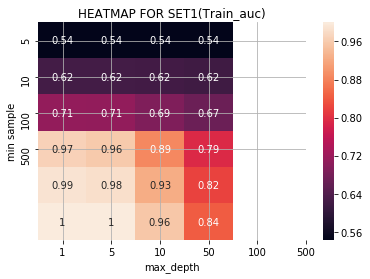

In [83]:
sns.heatmap(Train_auc,annot=True,xticklabels=[1, 5, 10, 50, 100, 500], yticklabels=[5, 10, 100, 500],)
plt.xlabel("max_depth")
plt.ylabel("min sample")
plt.title("HEATMAP FOR SET1(Train_auc)")
plt.grid()
plt.show()

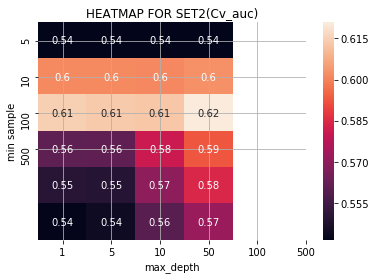

In [84]:
sns.heatmap(Cv_auc,annot=True,xticklabels=[1, 5, 10, 50, 100, 500], yticklabels=[5, 10, 100, 500],)
plt.xlabel("max_depth")
plt.ylabel("min sample")
plt.title("HEATMAP FOR SET2(Cv_auc)")
plt.grid()
plt.show()

In [85]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
Depth = [1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500]
Split = [5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
column_names = ['Depth','Split','train_auc','cv_auc']
x.add_column(column_names[0],Depth)
x.add_column(column_names[1],Split)
x.add_column(column_names[2],train_auc)
x.add_column(column_names[3],cv_auc)
print(x)

+-------+-------+--------------------+--------------------+
| Depth | Split |     train_auc      |       cv_auc       |
+-------+-------+--------------------+--------------------+
|   1   |   5   | 0.5430957845576421 | 0.5415316307965162 |
|   1   |   10  | 0.5430957845576421 | 0.5415316307965162 |
|   1   |  100  | 0.5430957845576421 | 0.5415316307965162 |
|   1   |  500  | 0.5430957845576421 | 0.5415316307965162 |
|   5   |   5   | 0.6234676880533357 | 0.6014622394555885 |
|   5   |   10  | 0.623412783856413  | 0.6015280706373393 |
|   5   |  100  | 0.6227847869874875 | 0.6012794595974632 |
|   5   |  500  | 0.6189838613914019 | 0.6025700635663964 |
|   10  |   5   | 0.7113190919261742 | 0.6146447199222076 |
|   10  |   10  | 0.7091657731722146 | 0.6138617971004705 |
|   10  |  100  | 0.6910208860805449 | 0.6130647714151121 |
|   10  |  500  | 0.6690223977816204 | 0.6208043591420319 |
|   50  |   5   | 0.968708787301396  | 0.5608396517123118 |
|   50  |   10  | 0.9590513733654342 | 0

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [86]:
feature_names_bow =[] 
feature_names_bow.extend(vectorizer_Cat.get_feature_names())
feature_names_bow.extend(vectorizer_sub_cat.get_feature_names())
feature_names_bow.extend(vectorizer_state.get_feature_names())
feature_names_bow.extend(vectorizer_teacher.get_feature_names())
feature_names_bow.extend(vectorizer_grade.get_feature_names())
feature_names_bow.extend(vectorizer_bow_essay.get_feature_names())
feature_names_bow.extend(vectorizer_bow_title.get_feature_names())
feature_names_bow.append('price')
feature_names_bow.append('teacher_number_of_previously_posted_projects')
len(feature_names_bow)


14964

In [87]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\graphviz-2.38\\release\\bin'

In [88]:
DT = DecisionTreeClassifier(max_depth=3)

In [89]:
clf = DT.fit(X_train_bow, y_train)

In [90]:
import graphviz

In [91]:
from sklearn import tree
from graphviz import Source
dot_data = tree.export_graphviz(DT, out_file=None, feature_names=feature_names_bow)
graph = graphviz.Source(dot_data)
graph.render("Bow tree",view = True)

'Bow tree.pdf'

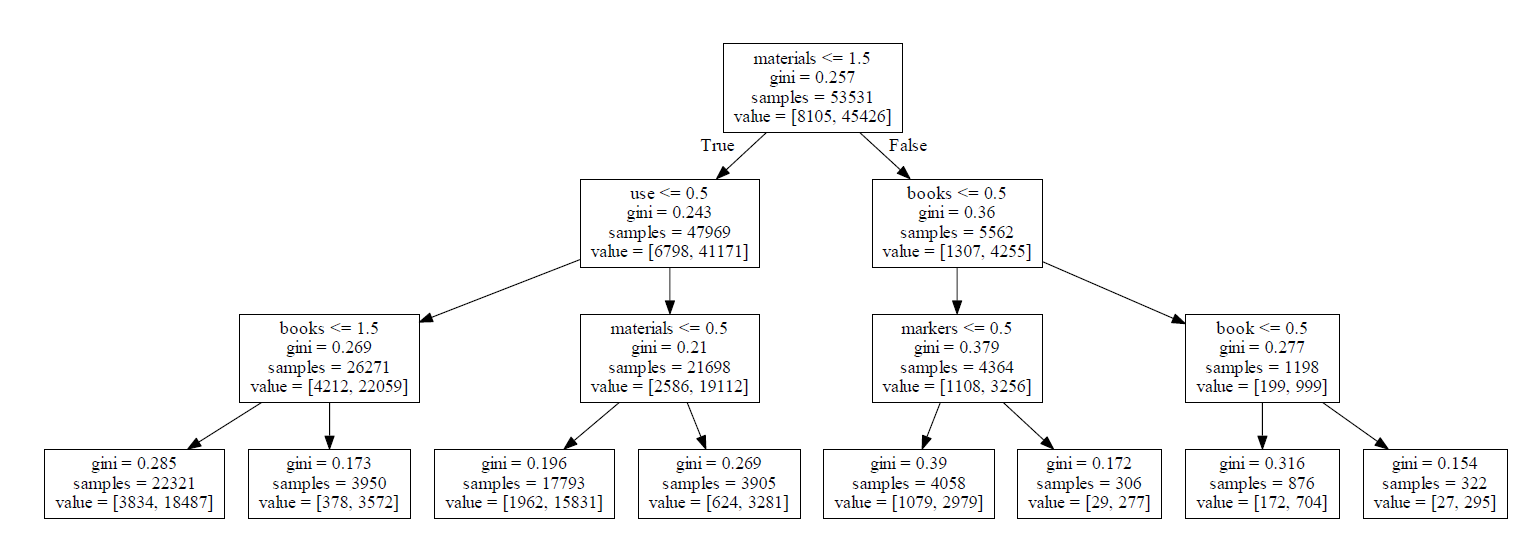

In [93]:
from IPython.display import Image

fig = Image(filename=('C:\\Users\\Prabhat .LAPTOP-486AQERF\\Desktop\\Applied AI\\Module_4_Supervised learning\\Chapter _2_Decesion Trees\\BOW-TREE.png'))
fig

**Using Best hyperparameters Value – Training the Model** 

In [94]:
#Taking the Optimal hyperparameter from heatmap and Pretty table of Max depth , Max Split , Train and CV AUC
max_depth = 10
min_samples_split = 500

In [95]:
from sklearn.metrics import roc_auc_score
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

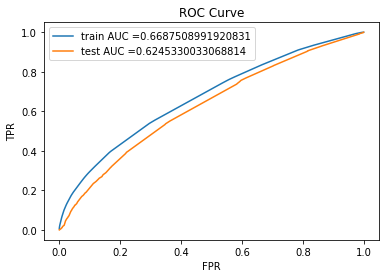

In [96]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


DT = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight ='balanced')
DT.fit(X_train_bow, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_bow = batch_predict(DT, X_train_bow)
y_test_pred_bow = batch_predict(DT, X_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_bow)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_bow)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.rcParams["figure.figsize"] = [5,5]
plt.show()

**Confusion Matrix**

**Train confusion matrix**

In [97]:
#https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
    
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [98]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
bow_train_confusion_matrix = confusion_matrix(y_train, predict(y_train_pred_bow, tr_thresholds, train_fpr, train_fpr))
print(bow_train_confusion_matrix)


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24880226788971552 for threshold 0.459
[[ 3772  4333]
 [11713 33713]]


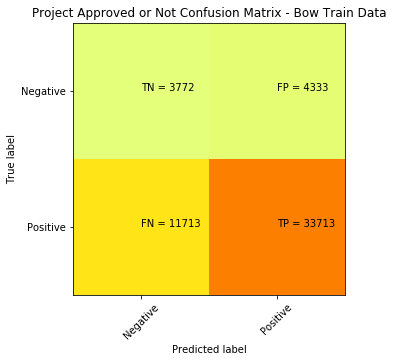

In [99]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

plt.clf()
plt.imshow(bow_train_confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Project Approved or Not Confusion Matrix - Bow Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(bow_train_confusion_matrix[i][j]))
plt.show()

**Test confusion matrix**

In [100]:
print("Train confusion matrix")
bow_test_confusion_matrix = confusion_matrix(y_test, predict(y_test_pred_bow, te_thresholds, test_fpr, test_fpr))
print(bow_test_confusion_matrix)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24309188823406447 for threshold 0.459
[[ 2069  2894]
 [ 7291 20521]]


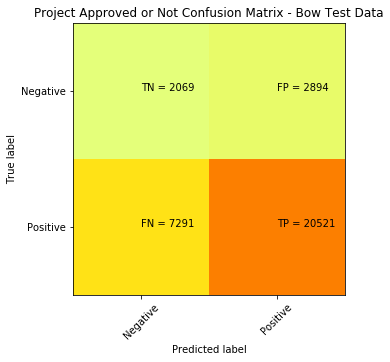

In [101]:
##http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

plt.clf()
plt.imshow(bow_test_confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Project Approved or Not Confusion Matrix - Bow Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(bow_test_confusion_matrix[i][j]))
plt.show()

**WordCloud: false positive data points - Essay (test Data)**

**Used following links for code**

https://stackoverflow.com/questions/47899463/how-to-extract-false-positive-false-negative-from-a-confusion-matrix-of-multicl

https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd

https://stackoverflow.com/questions/31593201/how-are-iloc-ix-and-loc-different

In [102]:
bow_essays_test_wc = bow_essays_test.todense()
bow_essays_test_wc.shape

(32775, 12655)

In [103]:
vectorizer_bow_essay = CountVectorizer(min_df=10)
bow_essays_train_fp = vectorizer_bow_essay.fit(X_train["preprocessed_essays"])
bow_essays_features = bow_essays_train_fp.get_feature_names()

In [104]:
bow_y_test_wc = list(y_test[::])

In [105]:
bow_fp_index = []
bow_fp_count = 0

for i in (range(len(y_test_pred_bow))):
    if bow_y_test_wc[i] == 0 and y_test_pred_bow[i] <= 0.459:
        bow_fp_index.append(i)
        bow_fp_count = bow_fp_count + 1 
    else :
        continue

In [106]:
bow_wordcloud = pd.DataFrame(bow_essays_test_wc)
bow_wordcloud  = bow_wordcloud .iloc[bow_fp_index,:]

In [107]:
bow_Indices_wordcloud = []


for P in range(12655):
    
    T = bow_wordcloud[P].sum()
    
    if T >= 100 :
        bow_Indices_wordcloud.append(P)
        
    else :
        continue


In [108]:
bow_fp_words = []

for a in bow_Indices_wordcloud :
    bow_fp_words.append(str(bow_essays_features[a]))

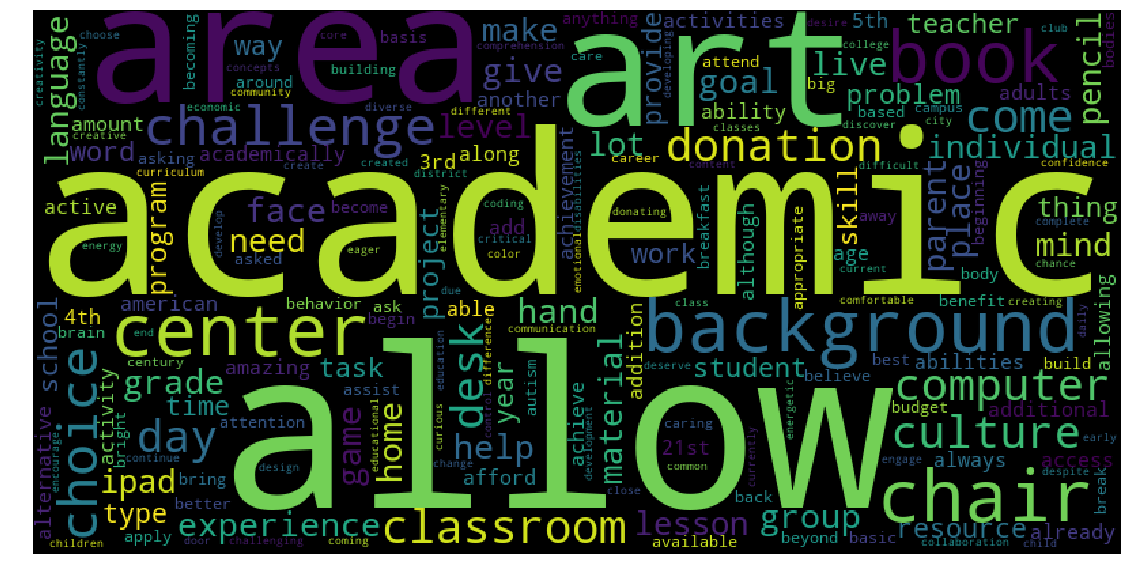

In [109]:
from wordcloud import WordCloud
unique_string=(" ").join(bow_fp_words)
wordcloud = WordCloud(width = 800, height = 400).generate(unique_string)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

**Box Plot : false positive data points - Price (Numerical Data)**

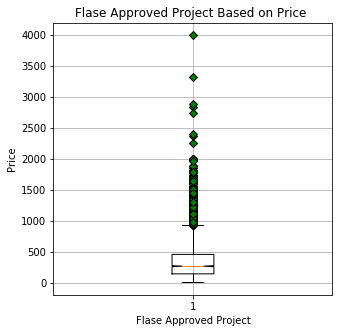

In [110]:
price_box = pd.DataFrame(X_test['price'])
price_box_plot = price_box.iloc[bow_fp_index,:]
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(price_box_plot.values,notch=True,flierprops=green_diamond)
plt.title('Flase Approved Project Based on Price ')
plt.xlabel('Flase Approved Project')
plt.ylabel('Price')
plt.grid()
plt.show()


**Observations**

**Most of the projects that were falsely predicted as accepted, it has been observed that they have Price quotation less than 500 Dollars**

**Price does not seem to be only one criterion on which projects have been accepted or rejected**


**PDF : false positive data points - Teacher_number_of_previously_posted_projects  (Numerical Data)**

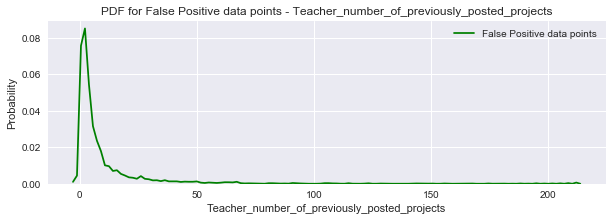

In [111]:
sns.set(style="darkgrid")
teacher_pdf = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])
teacher_pdf_fp = teacher_pdf.iloc[bow_fp_index,:]
plt.figure(figsize=(10,3))
sns.distplot(teacher_pdf_fp.values, hist=False, label="False Positive data points",color="G")
plt.title('PDF for False Positive data points - Teacher_number_of_previously_posted_projects')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Probability')
plt.legend()
plt.show()

**Observations**


**Most of the teachers have first time posted the project means previously posted project numbers of the most of the teachers are 0**

**The teacher who have the greater number of projects posted before has little bit better changes to get project approved**


### 2.4.2 Applying Decesion Tree  on TFIDF,<font color='red'> SET 2</font>



In [112]:
X_train_tfidf = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train ,Teacher_Prefix_one_hot_train,project_grade_category_one_hot_train,tfidf_essays_train,tfidf_title_train,price_train,prev_post_train)).tocsr()
X_train_tfidf.shape


(53531, 14964)

In [113]:
X_cv_tfidf = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv ,Teacher_Prefix_one_hot_cv,project_grade_category_one_hot_cv,tfidf_essays_cv,tfidf_title_cv,price_cv,prev_post_cv)).tocsr()
X_cv_tfidf.shape

(22942, 14964)

In [114]:
X_test_tfidf = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test ,Teacher_Prefix_one_hot_test,project_grade_category_one_hot_test,tfidf_essays_test,tfidf_title_test,price_test,prev_post_test)).tocsr()
X_test_tfidf.shape

(32775, 14964)

**GridSearchCV - Finding the best hyper parameter That maximum AUC value**

In [115]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

DT = DecisionTreeClassifier(class_weight ='balanced')

max_depth = [1, 5, 10, 50, 100, 500]
min_samples_split = [5, 10, 100, 500]
    
tuned_parameters = [{'max_depth': max_depth , 'min_samples_split':min_samples_split}]

clf = GridSearchCV(DT,tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
Train_auc = train_auc.reshape(len(max_depth),len(min_samples_split )) 
Cv_auc = cv_auc.reshape(len(max_depth),len(min_samples_split )) 

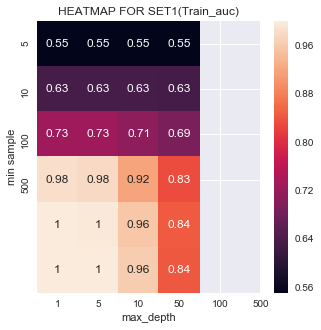

In [116]:
sns.heatmap(Train_auc,annot=True,xticklabels=[1, 5, 10, 50, 100, 500], yticklabels=[5, 10, 100, 500],)
plt.xlabel("max_depth")
plt.ylabel("min sample")
plt.title("HEATMAP FOR SET1(Train_auc)")
plt.grid()
plt.show()

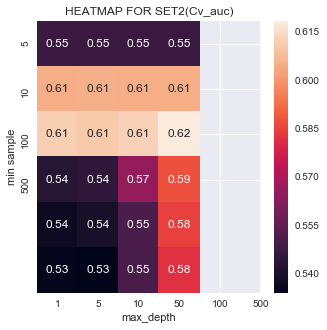

In [117]:
sns.heatmap(Cv_auc,annot=True,xticklabels=[1, 5, 10, 50, 100, 500], yticklabels=[5, 10, 100, 500],)
plt.xlabel("max_depth")
plt.ylabel("min sample")
plt.title("HEATMAP FOR SET2(Cv_auc)")
plt.grid()
plt.show()

In [118]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
Depth = [1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500]
Split = [5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
column_names = ['Depth','Split','train_auc','cv_auc']
x.add_column(column_names[0],Depth)
x.add_column(column_names[1],Split)
x.add_column(column_names[2],train_auc)
x.add_column(column_names[3],cv_auc)
print(x)


+-------+-------+--------------------+--------------------+
| Depth | Split |     train_auc      |       cv_auc       |
+-------+-------+--------------------+--------------------+
|   1   |   5   | 0.5505609022416142 | 0.5468644731583895 |
|   1   |   10  | 0.5505609022416142 | 0.5468644731583895 |
|   1   |  100  | 0.5505609022416142 | 0.5468644731583895 |
|   1   |  500  | 0.5505609022416142 | 0.5468644731583895 |
|   5   |   5   | 0.6346002842013356 | 0.6050246076865893 |
|   5   |   10  | 0.6345343792107906 | 0.605274069530664  |
|   5   |  100  | 0.633350753505383  | 0.605052756968737  |
|   5   |  500  | 0.6318554996664575 | 0.6050695543006188 |
|   10  |   5   | 0.7286823243456658 | 0.6117474773061209 |
|   10  |   10  | 0.7268240700330851 | 0.6107904176363047 |
|   10  |  100  | 0.7105692354285654 | 0.6124255523069398 |
|   10  |  500  | 0.6902671152681662 | 0.6182751751393708 |
|   50  |   5   | 0.9846821459392947 | 0.5427322760026523 |
|   50  |   10  | 0.9780565153219913 | 0

#### 2.4.2.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 2</font>

In [119]:
feature_names_tfidf =[] 
feature_names_tfidf.extend(vectorizer_Cat.get_feature_names())
feature_names_tfidf.extend(vectorizer_sub_cat.get_feature_names())
feature_names_tfidf.extend(vectorizer_state.get_feature_names())
feature_names_tfidf.extend(vectorizer_teacher.get_feature_names())
feature_names_tfidf.extend(vectorizer_grade.get_feature_names())
feature_names_tfidf.extend(vectorizer_tfidf_essay.get_feature_names())
feature_names_tfidf.extend(vectorizer_tfidf_title.get_feature_names())
feature_names_tfidf.append('price')
feature_names_tfidf.append('teacher_number_of_previously_posted_projects')
len(feature_names_tfidf)

14964

In [120]:
DT = DecisionTreeClassifier(max_depth=3)

In [121]:

clf = DT.fit(X_train_tfidf, y_train)

In [122]:
dot_data = tree.export_graphviz(DT, out_file=None, feature_names=feature_names_tfidf)
graph = graphviz.Source(dot_data)
graph.render("tfidf tree",view = True)

'tfidf tree.pdf'

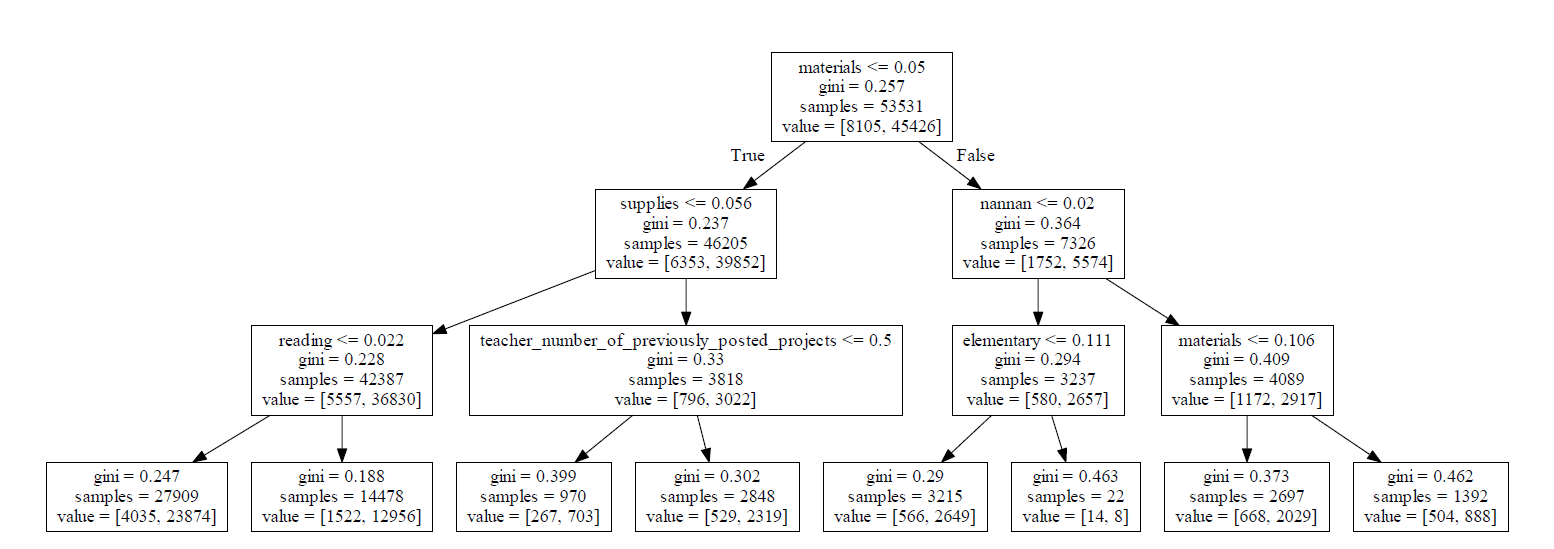

In [123]:

fig = Image(filename=('C:\\Users\\Prabhat .LAPTOP-486AQERF\\Desktop\\Applied AI\\Module_4_Supervised learning\\Chapter _2_Decesion Trees\\TFIDF-TREE.png'))
fig


**Using Best Hyperparameters Value – Training the Model** 

In [124]:
#Taking the Optimal hyperparameter from heatmap and Pretty table of Max depth , Max Split , Train and CV AUC
max_depth = 10
min_samples_split = 500

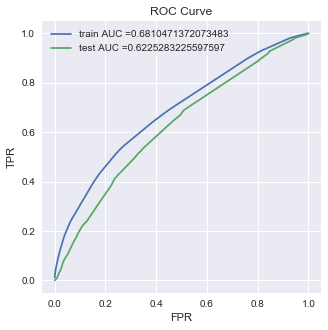

In [125]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


DT = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight ='balanced')
DT.fit(X_train_tfidf, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_tfidf = batch_predict(DT, X_train_tfidf)
y_test_pred_tfidf = batch_predict(DT, X_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_tfidf)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_tfidf)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.rcParams["figure.figsize"] = [5,5]
plt.show()


**Confusion Matrix**

**Train confusion matrix**

In [126]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
tfidf_train_confusion_matrix = confusion_matrix(y_train, predict(y_train_pred_tfidf, tr_thresholds, train_fpr, train_fpr))
print(tfidf_train_confusion_matrix)


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24867972451335627 for threshold 0.404
[[ 4347  3758]
 [13643 31783]]


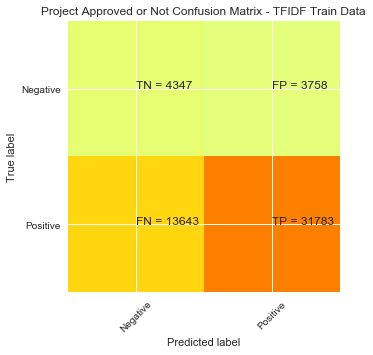

In [127]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

plt.clf()
plt.imshow(tfidf_train_confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Project Approved or Not Confusion Matrix - TFIDF Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(tfidf_train_confusion_matrix[i][j]))
plt.show()

**Test confusion matrix**

In [128]:
print("Test confusion matrix")
tfidf_test_confusion_matrix = confusion_matrix(y_test, predict(y_test_pred_tfidf, te_thresholds, test_fpr, test_fpr))
print(tfidf_test_confusion_matrix)

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999552400031033 for threshold 0.422
[[ 2492  2471]
 [ 9073 18739]]


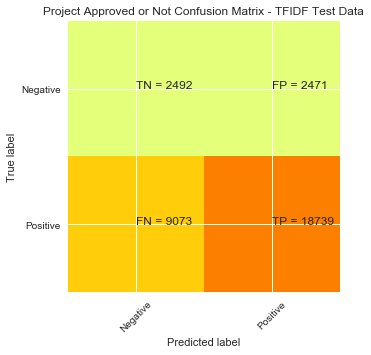

In [129]:
##http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

plt.clf()
plt.imshow(tfidf_test_confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Project Approved or Not Confusion Matrix - TFIDF Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(tfidf_test_confusion_matrix[i][j]))
plt.show()

**WordCloud : false positive data points - Essay (test Data)**


In [130]:
# Used following links for code 
#https://stackoverflow.com/questions/47899463/how-to-extract-false-positive-false-negative-from-a-confusion-matrix-of-multicl
#https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd
#https://stackoverflow.com/questions/31593201/how-are-iloc-ix-and-loc-different

In [131]:
tfidf_essays_test_wc = tfidf_essays_test.todense()
tfidf_essays_test_wc.shape

(32775, 12655)

In [132]:
vectorizer_tfidf_essay = CountVectorizer(min_df=10)
tfidf_essays_train_fp = vectorizer_tfidf_essay.fit(X_train["preprocessed_essays"])
tfidf_essays_features = tfidf_essays_train_fp.get_feature_names()

In [133]:
tfidf_y_test_wc = list(y_test[::])

In [134]:
tfidf_fp_index = []
tfidf_fp_count = 0
for i in (range(len(y_test_pred_tfidf))):
    if tfidf_y_test_wc[i] == 0 and y_test_pred_tfidf[i] <= 0.422:
        tfidf_fp_index.append(i)
        tfidf_fp_count = tfidf_fp_count + 1 
    else :
        continue

In [135]:
tfidf_wordcloud = pd.DataFrame(tfidf_essays_test_wc)
tfidf_wordcloud  = tfidf_wordcloud .iloc[tfidf_fp_index,:]

In [136]:
tfidf_Indices_wordcloud = []

for P in range(12655):
    
    T = tfidf_wordcloud[P].sum()
    
    if T >= 100 :
        tfidf_Indices_wordcloud.append(P)
        
    else :
        continue

In [137]:
tfidf_fp_words = []

for a in tfidf_Indices_wordcloud :
    tfidf_fp_words.append(str(tfidf_essays_features[a]))

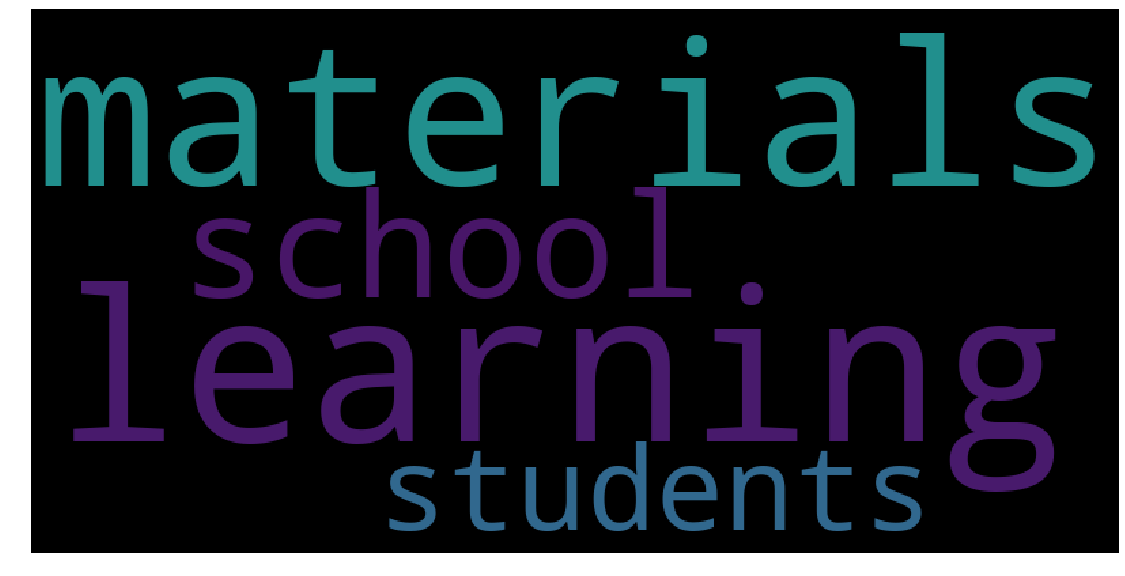

In [138]:
from wordcloud import WordCloud
unique_string=(" ").join(tfidf_fp_words)
wordcloud = WordCloud(width = 800, height = 400).generate(unique_string)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()


**Box Plot : false positive data points - Price (Numerical Data)**

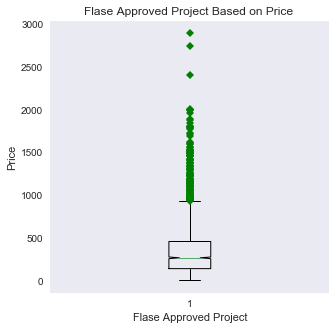

In [139]:
price_box = pd.DataFrame(X_test['price'])
price_box_plot = price_box.iloc[tfidf_fp_index,:]
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(price_box_plot.values,notch=True,flierprops=green_diamond)
plt.title('Flase Approved Project Based on Price ')
plt.xlabel('Flase Approved Project')
plt.ylabel('Price')
plt.grid()
plt.show()

**Observations**

**Most of the projects that were falsely predicted as accepted, it has been observed that they have Price quotation less than 500 Dollars**

**Price does not seem to be only one criterion on which projects have been accepted or rejected**


**PDF : false positive data points - Teacher_number_of_previously_posted_projects  (Numerical Data)**

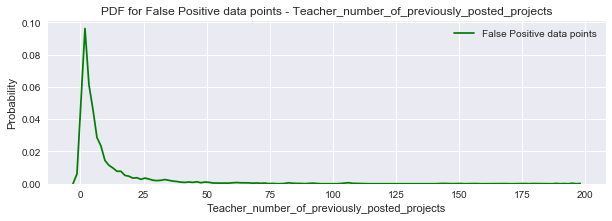

In [140]:
sns.set(style="darkgrid")
teacher_pdf = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])
teacher_pdf_fp = teacher_pdf.iloc[tfidf_fp_index,:]
plt.figure(figsize=(10,3))
sns.distplot(teacher_pdf_fp.values, hist=False, label="False Positive data points",color="G")
plt.title('PDF for False Positive data points - Teacher_number_of_previously_posted_projects')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Probability')
plt.legend()
plt.show()


**Observations**


**Most of the teachers have first time posted the project means previously posted project numbers of the most of the teachers is 0**

**The teacher who have the greater number of projects posted before has little bit better changes to get project approved**


### 2.4.3 Applying Decesion Tree  on AVG W2V,<font color='red'> SET 3</font>

In [141]:
X_train_avg_w2v = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train ,Teacher_Prefix_one_hot_train,project_grade_category_one_hot_train,avg_w2v_essays_train,avg_w2v_title_train,price_train,prev_post_train)).tocsr()
X_train_avg_w2v.shape

(53531, 701)

In [142]:
X_cv_avg_w2v = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv ,Teacher_Prefix_one_hot_cv,project_grade_category_one_hot_cv,avg_w2v_essays_cv,avg_w2v_title_cv,price_cv,prev_post_cv)).tocsr()
X_cv_avg_w2v.shape

(22942, 701)

In [143]:
X_test_avg_w2v = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test ,Teacher_Prefix_one_hot_test,project_grade_category_one_hot_test,avg_w2v_essays_test,avg_w2v_title_test,price_test,prev_post_test)).tocsr()
X_test_avg_w2v.shape

(32775, 701)

**GridSearchCV - Finding the best hyper parameter That maximum AUC value**

In [144]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

DT = DecisionTreeClassifier(class_weight ='balanced')

max_depth = [1, 5, 10, 50, 100, 500]
min_samples_split = [5, 10, 100, 500]
    
tuned_parameters = [{'max_depth': max_depth , 'min_samples_split':min_samples_split}]

clf = GridSearchCV(DT,tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_avg_w2v, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
Train_auc = train_auc.reshape(len(max_depth),len(min_samples_split )) 
Cv_auc = cv_auc.reshape(len(max_depth),len(min_samples_split )) 


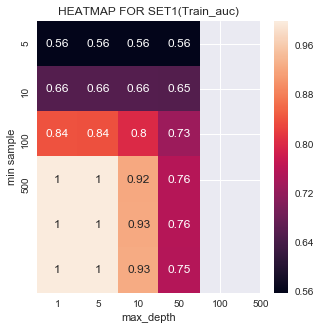

In [145]:
sns.heatmap(Train_auc,annot=True,xticklabels=[1, 5, 10, 50, 100, 500], yticklabels=[5, 10, 100, 500],)
plt.xlabel("max_depth")
plt.ylabel("min sample")
plt.title("HEATMAP FOR SET1(Train_auc)")
plt.grid()
plt.show()

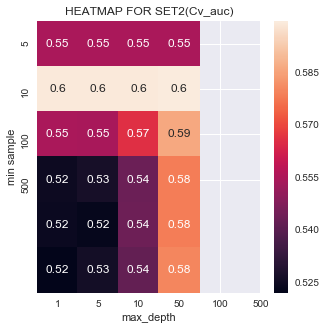

In [146]:
sns.heatmap(Cv_auc,annot=True,xticklabels=[1, 5, 10, 50, 100, 500], yticklabels=[5, 10, 100, 500],)
plt.xlabel("max_depth")
plt.ylabel("min sample")
plt.title("HEATMAP FOR SET2(Cv_auc)")
plt.grid()
plt.show()

In [147]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
Depth = [1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500]
Split = [5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
column_names = ['Depth','Split','train_auc','cv_auc']
x.add_column(column_names[0],Depth)
x.add_column(column_names[1],Split)
x.add_column(column_names[2],train_auc)
x.add_column(column_names[3],cv_auc)
print(x)

+-------+-------+--------------------+--------------------+
| Depth | Split |     train_auc      |       cv_auc       |
+-------+-------+--------------------+--------------------+
|   1   |   5   | 0.5580864311773048 | 0.5544579251533933 |
|   1   |   10  | 0.5580864311773048 | 0.5544579251533933 |
|   1   |  100  | 0.5580864311773048 | 0.5544579251533933 |
|   1   |  500  | 0.5580864311773048 | 0.5544579251533933 |
|   5   |   5   | 0.6555819613062471 | 0.5989805161577108 |
|   5   |   10  | 0.6555819613062471 | 0.5989805161577108 |
|   5   |  100  | 0.655459253485047  | 0.5990216115707252 |
|   5   |  500  | 0.6541444926418244 | 0.5995436875367024 |
|   10  |   5   | 0.8398620186550323 | 0.5544451139647105 |
|   10  |   10  | 0.8382574971313587 | 0.5542972546911993 |
|   10  |  100  | 0.8008358309761848 | 0.5658374216016383 |
|   10  |  500  | 0.7296130515033187 | 0.5859299013537154 |
|   50  |   5   | 0.9995798739723968 | 0.5245715007185295 |
|   50  |   10  | 0.9987886798378017 | 0

**Using Best Hyper parameters Value – Training the Model** 

In [148]:
#Taking the Optimal hyperparameter from heatmap and Pretty table of Max depth , Max Split , Train and CV AUC
max_depth = 10
min_samples_split = 500

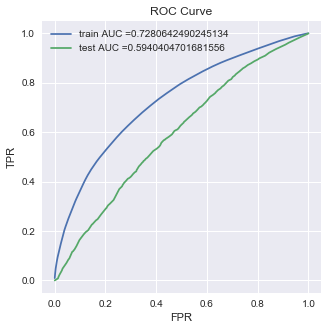

In [149]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


DT = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight ='balanced')
DT.fit(X_train_avg_w2v, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_avg_w2v = batch_predict(DT,X_train_avg_w2v)
y_test_pred_avg_w2v = batch_predict(DT,X_test_avg_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_avg_w2v)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_avg_w2v)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")

plt.show()

**Confusion Matrix**

**Train confusion matrix**

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24998583900921015 for threshold 0.401
[[ 4083  4022]
 [ 9266 36160]]


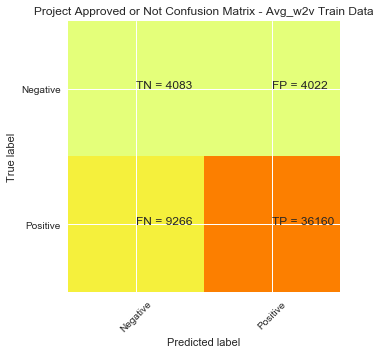

In [150]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
avg_w2v_train_confusion_matrix = confusion_matrix(y_train, predict(y_train_pred_avg_w2v, tr_thresholds, train_fpr, train_fpr))
print(avg_w2v_train_confusion_matrix)

#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

plt.clf()
plt.imshow(avg_w2v_train_confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Project Approved or Not Confusion Matrix - Avg_w2v Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(avg_w2v_train_confusion_matrix[i][j]))
plt.show()

**Test confusion matrix**

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24998293842295163 for threshold 0.484
[[ 2502  2461]
 [10386 17426]]


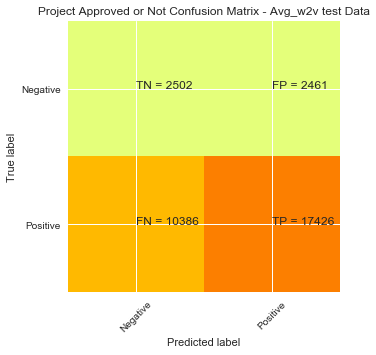

In [151]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
avg_w2v_test_confusion_matrix = confusion_matrix(y_test, predict(y_test_pred_avg_w2v, te_thresholds, test_fpr, test_fpr))
print(avg_w2v_test_confusion_matrix)

#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

plt.clf()
plt.imshow(avg_w2v_test_confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Project Approved or Not Confusion Matrix - Avg_w2v test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(avg_w2v_test_confusion_matrix[i][j]))
plt.show()

### 2.4.4 Applying Decesion Tree  on TFIDF W2V,<font color='red'> SET 4</font>

In [152]:
X_train_tfidf_w2v = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train ,Teacher_Prefix_one_hot_train,project_grade_category_one_hot_train,tfidf_w2v_essays_train,tfidf_w2v_title_train,price_train,prev_post_train)).tocsr()
X_train_tfidf_w2v.shape


(53531, 701)

In [153]:
X_cv_tfidf_w2v = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv ,Teacher_Prefix_one_hot_cv,project_grade_category_one_hot_cv,tfidf_w2v_essays_cv,tfidf_w2v_title_cv,price_cv,prev_post_cv)).tocsr()
X_cv_tfidf_w2v.shape

(22942, 701)

In [154]:
X_test_tfidf_w2v = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test ,Teacher_Prefix_one_hot_test,project_grade_category_one_hot_test,tfidf_w2v_essays_test,tfidf_w2v_title_test,price_test,prev_post_test)).tocsr()
X_test_tfidf_w2v.shape

(32775, 701)

**GridSearchCV - Finding the best hyper parameter That maximum AUC value**

In [155]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

DT = DecisionTreeClassifier(class_weight ='balanced')

max_depth = [1, 5, 10, 50, 100, 500]
min_samples_split = [5, 10, 100, 500]
    
tuned_parameters = [{'max_depth': max_depth , 'min_samples_split':min_samples_split}]

clf = GridSearchCV(DT,tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_tfidf_w2v, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
Train_auc = train_auc.reshape(len(max_depth),len(min_samples_split )) 
Cv_auc = cv_auc.reshape(len(max_depth),len(min_samples_split )) 

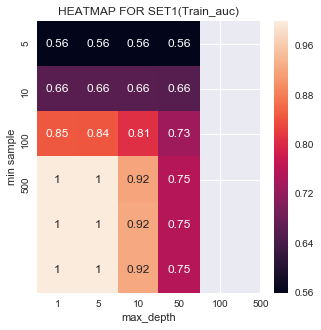

In [156]:
sns.heatmap(Train_auc,annot=True,xticklabels=[1, 5, 10, 50, 100, 500], yticklabels=[5, 10, 100, 500],)
plt.xlabel("max_depth")
plt.ylabel("min sample")
plt.title("HEATMAP FOR SET1(Train_auc)")
plt.grid()
plt.show()

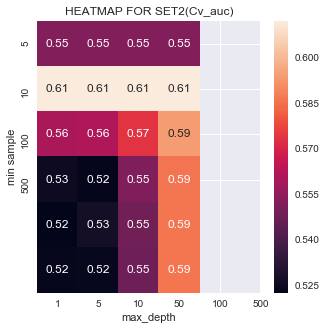

In [157]:
sns.heatmap(Cv_auc,annot=True,xticklabels=[1, 5, 10, 50, 100, 500], yticklabels=[5, 10, 100, 500],)
plt.xlabel("max_depth")
plt.ylabel("min sample")
plt.title("HEATMAP FOR SET2(Cv_auc)")
plt.grid()
plt.show()

In [158]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
Depth = [1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500]
Split = [5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
column_names = ['Depth','Split','train_auc','cv_auc']
x.add_column(column_names[0],Depth)
x.add_column(column_names[1],Split)
x.add_column(column_names[2],train_auc)
x.add_column(column_names[3],cv_auc)
print(x)

+-------+-------+--------------------+--------------------+
| Depth | Split |     train_auc      |       cv_auc       |
+-------+-------+--------------------+--------------------+
|   1   |   5   | 0.5594307170068968 | 0.5520607759651467 |
|   1   |   10  | 0.5594307170068968 | 0.5520607759651467 |
|   1   |  100  | 0.5594307170068968 | 0.5520607759651467 |
|   1   |  500  | 0.5594307170068968 | 0.5520607759651467 |
|   5   |   5   | 0.6601995971699717 | 0.6120838272326965 |
|   5   |   10  | 0.6601995971699717 | 0.6120838272326965 |
|   5   |  100  | 0.6601380731543964 | 0.6120842753389051 |
|   5   |  500  | 0.6585707113119793 | 0.6119380576892192 |
|   10  |   5   | 0.8453751653983327 | 0.5605033005731044 |
|   10  |   10  | 0.8434922690859755 | 0.561124710604747  |
|   10  |  100  | 0.8080505238939932 | 0.5739088259399613 |
|   10  |  500  | 0.7345807537706378 | 0.5940395508051618 |
|   50  |   5   | 0.9997084718139776 | 0.5254365576919708 |
|   50  |   10  | 0.9990120992056984 | 0

**Using Best Hyper parameters Value – Training the Model** 

In [159]:
#Taking the Optimal hyperparameter from heatmap and Pretty table of Max depth , Max Split , Train and CV AUC
max_depth = 10
min_samples_split = 500

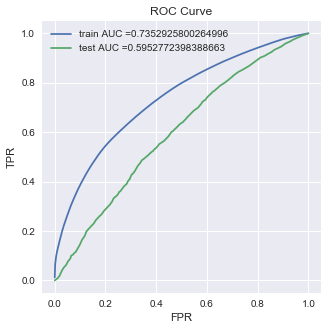

In [160]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

DT = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight ='balanced')
DT.fit(X_train_tfidf_w2v, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_tfidf_w2v = batch_predict(DT,X_train_tfidf_w2v)
y_test_pred_tfidf_w2v = batch_predict(DT,X_test_tfidf_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_tfidf_w2v)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_tfidf_w2v)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")

plt.show()




**Confusion Matrix**

**Train confusion matrix**

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999679941057398 for threshold 0.382
[[ 4067  4038]
 [ 9180 36246]]


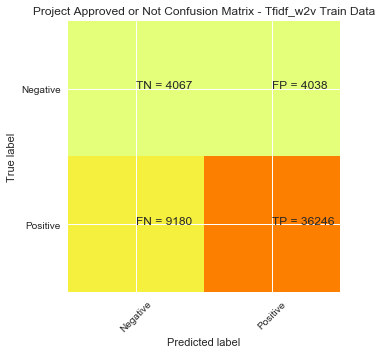

In [161]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
tfidf_w2v_train_confusion_matrix = confusion_matrix(y_train, predict(y_train_pred_tfidf_w2v, tr_thresholds, train_fpr, train_fpr))
print(tfidf_w2v_train_confusion_matrix)

#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

plt.clf()
plt.imshow(tfidf_w2v_train_confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Project Approved or Not Confusion Matrix - Tfidf_w2v Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(tfidf_w2v_train_confusion_matrix[i][j]))
plt.show()

**Test confusion matrix**

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499812332802127 for threshold 0.471
[[ 2503  2460]
 [10165 17647]]


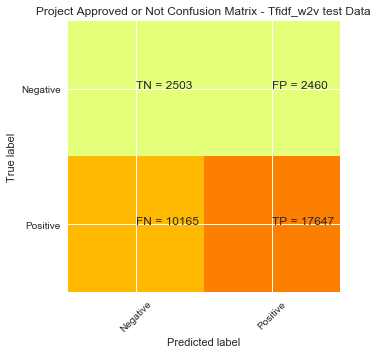

In [162]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
tfidf_w2v_test_confusion_matrix = confusion_matrix(y_test, predict(y_test_pred_tfidf_w2v, te_thresholds, test_fpr, test_fpr))
print(tfidf_w2v_test_confusion_matrix)

#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

plt.clf()
plt.imshow(avg_w2v_test_confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Project Approved or Not Confusion Matrix - Tfidf_w2v test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(tfidf_w2v_test_confusion_matrix[i][j]))
plt.show()

<h2>2.5 :  5k best features from features of Set 2 usingfeature_importances_ </h2>

In [163]:
from scipy.sparse import hstack
X_train_tfidf = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train ,Teacher_Prefix_one_hot_train,project_grade_category_one_hot_train,tfidf_essays_train,tfidf_title_train,price_train,prev_post_train,Quantity_train,title_word_count_train,essay_word_count_train)).tocsr()
X_train_tfidf.shape

(53531, 14967)

In [164]:
X_cv_tfidf = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv ,Teacher_Prefix_one_hot_cv,project_grade_category_one_hot_cv,tfidf_essays_cv,tfidf_title_cv,price_cv,prev_post_cv,Quantity_cv,title_word_count_cv,essay_word_count_cv)).tocsr()
X_cv_tfidf.shape

(22942, 14967)

In [165]:
X_test_tfidf = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test ,Teacher_Prefix_one_hot_test,project_grade_category_one_hot_test,tfidf_essays_test,tfidf_title_test,price_test,prev_post_test,Quantity_test,title_word_count_test,essay_word_count_test)).tocsr()
X_test_tfidf.shape

(32775, 14967)

In [166]:
#https://stackoverflow.com/questions/51682470/how-to-get-feature-importance-in-decision-tree
from sklearn.tree import DecisionTreeClassifier
import math
clf = DecisionTreeClassifier(class_weight ='balanced')
clf = clf.fit(X_train_tfidf, y_train)
X_train_tfidf_5K_FI = clf.tree_.compute_feature_importances()
X_train_tfidf_5K_FI .shape


(14967,)

In [167]:
FI_DF = pd.DataFrame(X_train_tfidf_5K_FI)
FI_DF = np.transpose(FI_DF)

In [168]:
#As suggested in struction finding the indicies for best features

Indices = []

for P in range(14967):
    
    T = FI_DF[P].sum()
    
    if T > 0 :
        Indices.append(T)
    else :
        continue

In [169]:
X_train_tfidf = X_train_tfidf.todense()
X_train_tfidf = pd.DataFrame(X_train_tfidf)
Train_tfidf = X_train_tfidf.iloc[:, Indices]
Train_tfidf.shape

(53531, 2188)

**Observation** 

**We were looking for 5K best feature but got very less no’s of important feature based on SET 2 (TFIDF) data.**


**BY using this data for training model , there is possibility , we get the very less model performance or a Dumb Model**



In [170]:
X_test_tfidf = X_test_tfidf.todense()
X_test_tfidf = pd.DataFrame(X_test_tfidf)
Test_tfidf = X_test_tfidf.iloc[:, Indices]
Test_tfidf.shape


(32775, 2188)

**GridSearchCV - Finding the best hyper parameter That maximum AUC value**

**With L1 Regularizer**

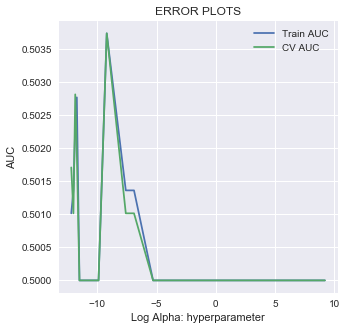

In [171]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

sgd = SGDClassifier(loss="hinge",penalty='l1',class_weight ='balanced')

Cs = [0.000005,0.000006,0.000007, 0.000008,0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]
log_alphas = []
for P in Cs :
    T = math.log(P)
    log_alphas.append(T)

tuned_parameters = [{'alpha': Cs}]

clf = GridSearchCV(sgd,tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(Train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.legend()
plt.xlabel("Log Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.rcParams["figure.figsize"] = [16,9]
plt.show()


In [172]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
column_names = ['alphas', 'log_alphas', 'train_auc', 'cv_auc']
x.add_column(column_names[0],Cs)
x.add_column(column_names[1],log_alphas)
x.add_column(column_names[2],train_auc)
x.add_column(column_names[3],cv_auc)
print(x)


+--------+---------------------+--------------------+--------------------+
| alphas |      log_alphas     |     train_auc      |       cv_auc       |
+--------+---------------------+--------------------+--------------------+
| 5e-06  | -12.206072645530174 | 0.5010137569331624 | 0.5017074442510989 |
| 6e-06  |  -12.02375108873622 | 0.5013606961792402 | 0.5010138443704798 |
| 7e-06  |  -11.86960040890896 | 0.5023292138104966 | 0.5028119234901912 |
| 8e-06  | -11.736069016284437 | 0.5027666316603864 | 0.5019370538723469 |
| 1e-05  | -11.512925464970229 |        0.5         |        0.5         |
| 5e-05  |  -9.903487552536127 |        0.5         |        0.5         |
| 0.0001 |  -9.210340371976182 | 0.5037351492916428 | 0.5037351329920583 |
| 0.0005 |  -7.600902459542082 | 0.5013606961792402 | 0.5010138443704798 |
| 0.001  |  -6.907755278982137 | 0.5013606961792402 | 0.5010138443704798 |
| 0.005  |  -5.298317366548036 |        0.5         |        0.5         |
|  0.01  |  -4.6051701859

**With L2 Regularizer**

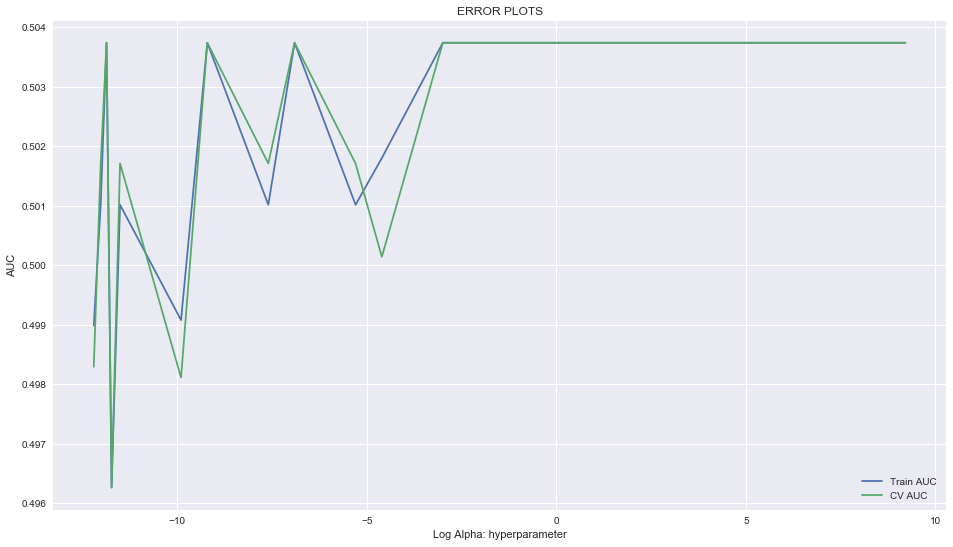

In [173]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge",penalty='l2',class_weight ='balanced')

Cs = [0.000005,0.000006,0.000007, 0.000008,0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]
log_alphas = []
for P in Cs :
    T = math.log(P)
    log_alphas.append(T)

tuned_parameters = [{'alpha': Cs}]

clf = GridSearchCV(sgd,tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(Train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.legend()
plt.xlabel("Log Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.rcParams["figure.figsize"] = [16,9]
plt.show()


In [174]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
column_names = ['alphas', 'log_alphas', 'train_auc', 'cv_auc']
x.add_column(column_names[0],Cs)
x.add_column(column_names[1],log_alphas)
x.add_column(column_names[2],train_auc)
x.add_column(column_names[3],cv_auc)
print(x)

+--------+---------------------+---------------------+---------------------+
| alphas |      log_alphas     |      train_auc      |        cv_auc       |
+--------+---------------------+---------------------+---------------------+
| 5e-06  | -12.206072645530174 | 0.49898624306683764 | 0.49829255574890113 |
| 6e-06  |  -12.02375108873622 |  0.5010137569331624 |  0.5017074442510989 |
| 7e-06  |  -11.86960040890896 |  0.5037351492916428 |  0.5037351329920583 |
| 8e-06  | -11.736069016284437 |  0.4962648507083573 | 0.49626486700794165 |
| 1e-05  | -11.512925464970229 |  0.5010137569331624 |  0.5017074442510989 |
| 5e-05  |  -9.903487552536127 | 0.49907672167064954 | 0.49811128601167587 |
| 0.0001 |  -9.210340371976182 |  0.5037351492916428 |  0.5037351329920583 |
| 0.0005 |  -7.600902459542082 |  0.5010137569331624 |  0.5017074442510989 |
| 0.001  |  -6.907755278982137 |  0.5037351492916428 |  0.5037351329920583 |
| 0.005  |  -5.298317366548036 |  0.5010137569331624 |  0.5017074442510989 |

**Observation**

**For L2 regularizer we are getting a very unintuitive plot , difficult to get the best hyper parameter**

**Train and CV Auc seems to have the similar values as 0.5 , that indicate, the model training using this data will boils down into a dumb model**

**RE training the model with small range of Alpha Values**

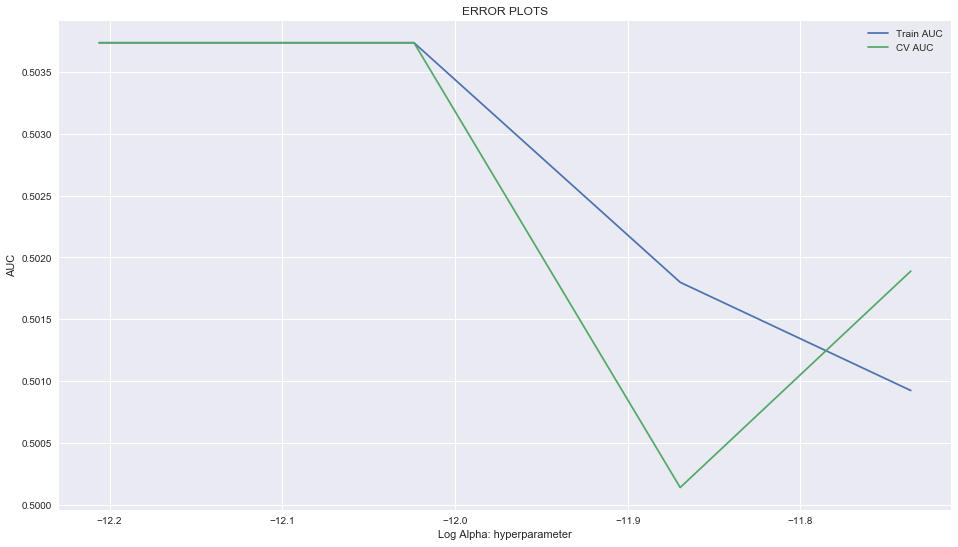

In [175]:
sgd = SGDClassifier(loss="hinge",penalty='l2',class_weight ='balanced')

Cs = [0.000005,0.000006,0.000007, 0.000008]
log_alphas = []
for P in Cs :
    T = math.log(P)
    log_alphas.append(T)

tuned_parameters = [{'alpha': Cs}]

clf = GridSearchCV(sgd,tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(Train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.legend()
plt.xlabel("Log Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.rcParams["figure.figsize"] = [15,5]
plt.show()


In [176]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
column_names = ['alphas', 'log_alphas', 'train_auc', 'cv_auc']
x.add_column(column_names[0],Cs)
x.add_column(column_names[1],log_alphas)
x.add_column(column_names[2],train_auc)
x.add_column(column_names[3],cv_auc)
print(x)


+--------+---------------------+--------------------+--------------------+
| alphas |      log_alphas     |     train_auc      |       cv_auc       |
+--------+---------------------+--------------------+--------------------+
| 5e-06  | -12.206072645530174 | 0.5037351492916428 | 0.5037351329920583 |
| 6e-06  |  -12.02375108873622 | 0.5037351492916428 | 0.5037351329920583 |
| 7e-06  |  -11.86960040890896 | 0.5017981140291299 | 0.5001389747526354 |
| 8e-06  | -11.736069016284437 | 0.5009232783293505 | 0.5018887139883241 |
+--------+---------------------+--------------------+--------------------+


**Using Best aplha Value – Training the Model** 

In [177]:
#Taking the Optimal hypermeter from L2 Regularize for FPR, TPR plot and confusion matrix 
best_alpha_cat_num_freatures = 0.00005

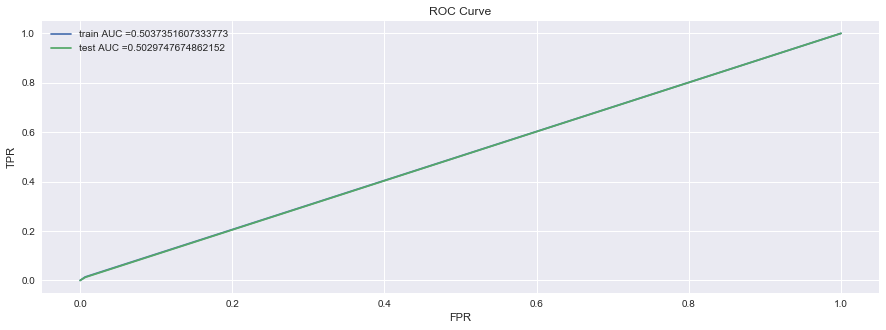

In [178]:
SGD = SGDClassifier(loss="hinge",alpha= best_alpha_cat_num_freatures,class_weight ='balanced')
SGD.fit(Train_tfidf, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_cat_num_freatures = SGD.decision_function(Train_tfidf)
y_test_pred_cat_num_freatures = SGD.decision_function(Test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_cat_num_freatures)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_cat_num_freatures)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")

plt.show()



**Observation**


**ROC Curve came a straight line for Train and Test – Area Under the Curve, indicated the trained  model using the TFIDF Feature importance data is dumb model , as we are getting Train and test AUC as 50 %**


**Confusion Matrix**

**Train confusion matrix**

In [179]:
#https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
    
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.006618164353501868 for threshold 28.138
[[ 8051    54]
 [44784   642]]


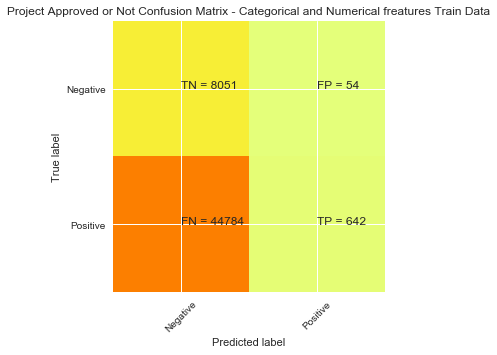

In [180]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cat_num_freatures_train_confusion_matrix = confusion_matrix(y_train, predict(y_train_pred_cat_num_freatures, tr_thresholds, train_fpr, train_fpr))
print(cat_num_freatures_train_confusion_matrix)

#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

plt.clf()
plt.imshow(cat_num_freatures_train_confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Project Approved or Not Confusion Matrix - Categorical and Numerical freatures Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cat_num_freatures_train_confusion_matrix[i][j]))
plt.show()


**Test confusion matrix**

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.006803763120109159 for threshold 28.138
[[ 4929    34]
 [27456   356]]


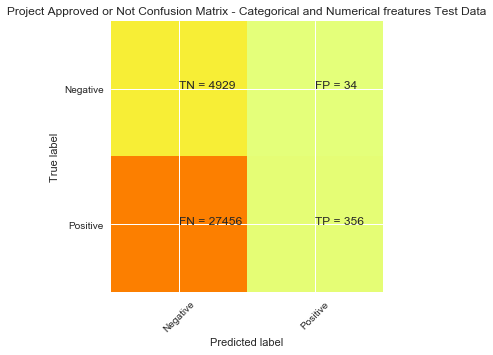

In [181]:
print("Train confusion matrix")
cat_num_freatures_test_confusion_matrix = confusion_matrix(y_test, predict(y_test_pred_cat_num_freatures, te_thresholds, test_fpr, test_fpr))
print(cat_num_freatures_test_confusion_matrix)

##http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

plt.clf()
plt.imshow(cat_num_freatures_test_confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Project Approved or Not Confusion Matrix - Categorical and Numerical freatures Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cat_num_freatures_test_confusion_matrix[i][j]))
plt.show()

<h1>3. Conclusions</h1>

In [182]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter(Max depth &  Min Samples Split )", "AUC"]
x.add_row(["BOW",  "Decesion Tree  " , (10 , 500), 0.62])
x.add_row(["TFIDF", "Decesion Tree  " , (10 ,  500), 0.62])
x.add_row(["AVG W2V", "Decesion Tree  " , (10 , 500), 0.60])
x.add_row(["TFIDF W2V", "Decesion Tree   " , (10 , 500), 0.60])
x.add_row(["TFIDF 5k Features", "Linear SVM with L2-Reg  ", 0.00005, 0.5])

print(x)

+-------------------+--------------------------+--------------------------------------------------+------+
|     Vectorizer    |          Model           | Hyper Parameter(Max depth &  Min Samples Split ) | AUC  |
+-------------------+--------------------------+--------------------------------------------------+------+
|        BOW        |     Decesion Tree        |                    (10, 500)                     | 0.62 |
|       TFIDF       |     Decesion Tree        |                    (10, 500)                     | 0.62 |
|      AVG W2V      |     Decesion Tree        |                    (10, 500)                     | 0.6  |
|     TFIDF W2V     |     Decesion Tree        |                    (10, 500)                     | 0.6  |
| TFIDF 5k Features | Linear SVM with L2-Reg   |                      5e-05                       | 0.5  |
+-------------------+--------------------------+--------------------------------------------------+------+
